In [749]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [720]:
df = pd.read_csv('Churn_Modelling.csv')

In [721]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [722]:
df.shape

(10000, 14)

In [723]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

In [724]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [725]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [726]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [727]:
df.duplicated().sum()

0

In [728]:
# Convert 'Gender' to numerical where Female=0 and Male=1
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [729]:
df = pd.get_dummies(df, columns=['Geography'])

In [730]:
df.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True


In [731]:
df['Geography_France'] = df['Geography_France'].astype(int)
df['Geography_Germany'] = df['Geography_Germany'].astype(int)
df['Geography_Spain'] = df['Geography_Spain'].astype(int)

In [732]:
df.head(2)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1


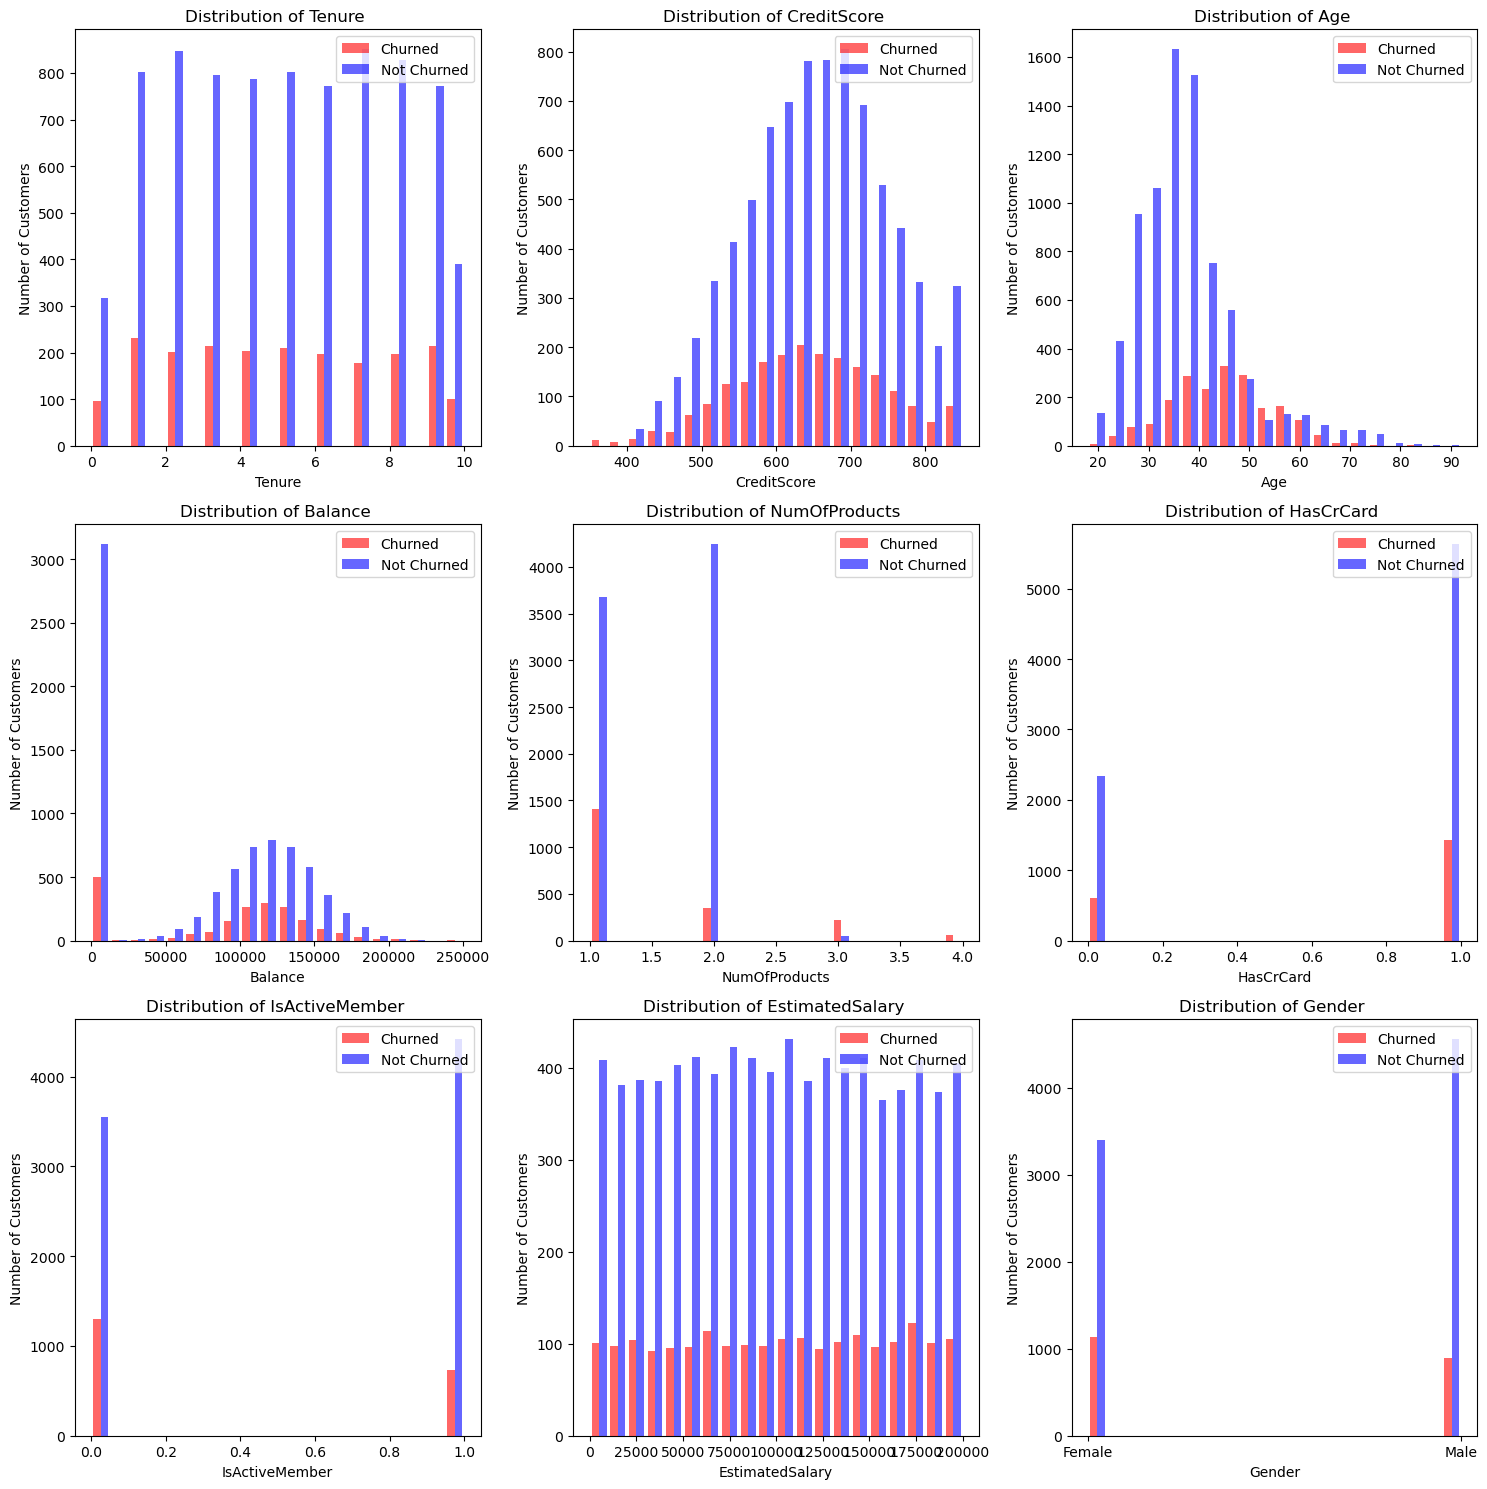

In [733]:
import matplotlib.pyplot as plt

numerical_features = ['Tenure', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary','Gender']

fig, axs = plt.subplots(3, 3, figsize=(15, 15)) # Create 3x3 grid of subplots

axs = axs.ravel() # Flatten the 2D array to iterate more easily

for i, feature in enumerate(numerical_features):
    axs[i].hist([churned[feature], not_churned[feature]], bins=20, alpha=0.6, color=['red', 'blue'], label=['Churned', 'Not Churned'])
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Number of Customers')
    axs[i].set_title(f'Distribution of {feature} ')
    axs[i].legend(loc='upper right')

plt.tight_layout() # to provide sufficient space for labels
plt.show()


## General Observations

1. **Tenure**: There isn't a clear pattern indicating that tenure has a strong impact on customer churn
2. **CreditScore**: The credit scores of churned and not churned customers are somewhat similarly distributed. There is no clear pattern indicating that credit score has a strong impact on customer churn.
3. **Age**: The age distribution shows that younger customers are less likely to churn compared to older customers.
4. **Balance**: Customers with a balance around 100,000 to 150,000 seem to churn more compared to those with lower or higher balances.
5. **NumOfProducts**: Customers with 1 or 2 products are less likely to churn compared to those with more products.
6. **HasCrCard**: Having a credit card does not seem to have a significant impact on churn.
7. **IsActiveMember**: Active members are less likely to churn compared to inactive members.
8. **EstimatedSalary**: Estimated salary does not show a clear pattern in relation to customer churn.


In [734]:
df1 = df 

In [735]:
# Features to scale
features_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the features
df1[features_to_scale] = scaler.fit_transform(df1[features_to_scale])

# Display the first few rows of the scaled data
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [736]:
X = df1.drop('Exited', axis=1)
y = df.Exited

In [737]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [738]:
X_train.shape

(8000, 12)

In [739]:
X_test.shape

(2000, 12)

In [740]:
model = tf.keras.models.Sequential([
    layers.Dense(45, input_shape=(12,), activation='ReLU'),  
    layers.Dense(4, activation='ReLU'),
    layers.Dense(1, activation='sigmoid')
])

In [741]:
model.summary()

Model: "sequential_77"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_260 (Dense)           (None, 45)                585       
                                                                 
 dense_261 (Dense)           (None, 4)                 184       
                                                                 
 dense_262 (Dense)           (None, 1)                 5         
                                                                 
Total params: 774
Trainable params: 774
Non-trainable params: 0
_________________________________________________________________


In [742]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy']) 

In [743]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2, verbose=1)

Epoch 1/100
64/64 [==============================] - 1s 6ms/step - loss: 0.5234 - accuracy: 0.7881 - val_loss: 0.4781 - val_accuracy: 0.7987
Epoch 2/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7934 - val_loss: 0.4627 - val_accuracy: 0.7987
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4693 - accuracy: 0.7934 - val_loss: 0.4534 - val_accuracy: 0.7987
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4612 - accuracy: 0.7934 - val_loss: 0.4461 - val_accuracy: 0.7987
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.4542 - accuracy: 0.7934 - val_loss: 0.4393 - val_accuracy: 0.7987
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.7934 - val_loss: 0.4331 - val_accuracy: 0.7987
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.7936 - val_loss: 0.4279 - val_accuracy: 0.7987
Epoch 8/100
6

Epoch 59/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8656 - val_loss: 0.3430 - val_accuracy: 0.8575
Epoch 60/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8630 - val_loss: 0.3428 - val_accuracy: 0.8619
Epoch 61/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8652 - val_loss: 0.3418 - val_accuracy: 0.8556
Epoch 62/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8644 - val_loss: 0.3444 - val_accuracy: 0.8644
Epoch 63/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8630 - val_loss: 0.3423 - val_accuracy: 0.8594
Epoch 64/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8631 - val_loss: 0.3420 - val_accuracy: 0.8581
Epoch 65/100
64/64 [==============================] - 0s 2ms/step - loss: 0.3299 - accuracy: 0.8656 - val_loss: 0.3427 - val_accuracy: 0.8612
Epoch 

In [744]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)

63/63 [==============================] - 0s 1ms/step


In [745]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

accuracy_score(y_test, y_pred)

0.8035

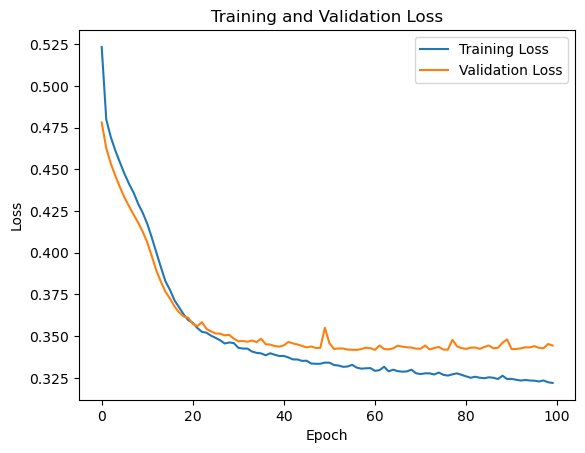

In [746]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

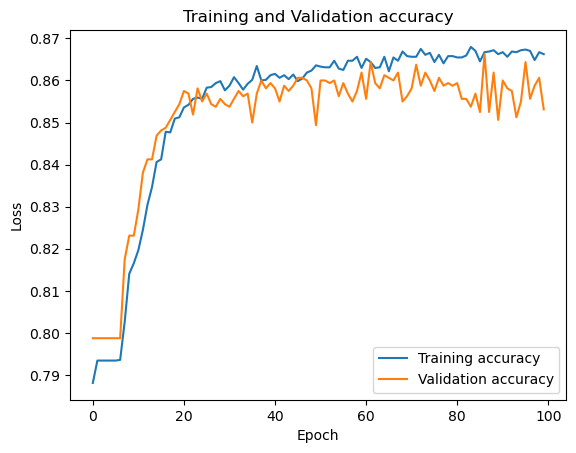

In [747]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation accuracy')
plt.legend()
plt.show()


Churn Prediction - Overall Accuracy: 86.10%
--------------------------
              precision    recall  f1-score   support

    No Churn       0.89      0.94      0.92      1607
       Churn       0.69      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



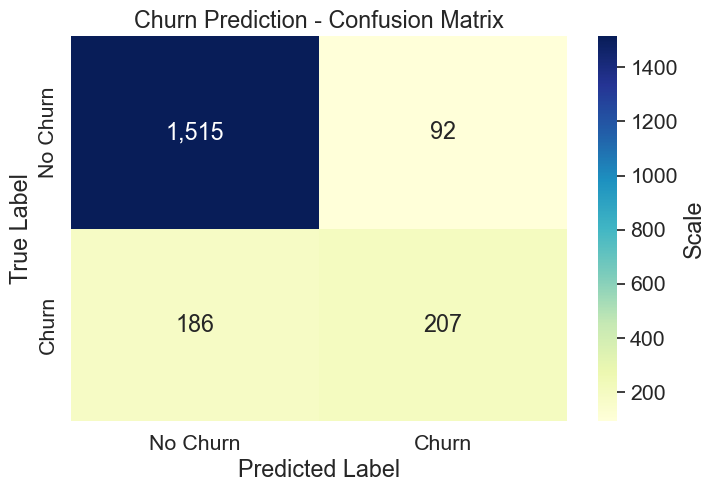

In [754]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def report_heatmap(y_val, y_pred, title):
    # overall accuracy
    acc = accuracy_score(y_val, y_pred)
    print(f'{title} - Overall Accuracy: {acc*100:.2f}%')
    print('--------------------------')

    # report
    target_names = ['No Churn', 'Churn']
    print(classification_report(y_val, y_pred, target_names=target_names))

    # confusion matrix
    cm = confusion_matrix(y_val, y_pred)

    # Confusion Matrix Heatmap
    labels = ['No Churn', 'Churn']
    plt.figure(1, figsize=(8, 5))

    plt.title(f'{title} - Confusion Matrix')

    sns.set(font_scale=1.4)
    ax = sns.heatmap(cm, annot=True, fmt=',.0f', cmap="YlGnBu", cbar_kws={'label': 'Scale'})

    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    ax.set(ylabel='True Label', xlabel='Predicted Label')

    plt.show()

# Call the function
report_heatmap(y_test, y_pred, 'Churn Prediction')